In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

from keras.models import Sequential
from keras.layers import InputLayer, LSTM, Dense, Dropout, Conv1D, MaxPooling1D, BatchNormalization
from keras.optimizers import Adam
from keras.losses import MeanSquaredError
from keras.metrics import RootMeanSquaredError
from keras.constraints import MaxNorm
from keras.callbacks import ModelCheckpoint

import time

In [2]:
filepath = 'C:/Users/ss230/Documents/Study/NSIDC/Edited Data/S_Sea_Ice_Index_Regional_Monthly_Data_G02135_v3.0.xlsx'
Ross_Extent = pd.read_excel(filepath, sheet_name='Ross-Extent-km^2')

In [3]:
import sys
sys.path.append('C:/Users/ss230/Documents/Study/NSIDC/SH/Bi_LSTM_Extent/')
import Function as fp

In [4]:
fp.month_mapping(Ross_Extent)
fp.date_time(Ross_Extent)

,Extent,Date
0,1040455.516,1979-01-01
1,239334.118,1979-02-01
2,557365.154,1979-03-01
3,2054855.924,1979-04-01
4,2973925.625,1979-05-01
...,...,...
533,3137598.938,2023-06-01
534,3201783.453,2023-07-01
535,2973294.266,2023-08-01
536,3354839.711,2023-09-01


In [5]:
scaler = MinMaxScaler()
Ross_Extent['Extent'] = scaler.fit_transform(Ross_Extent['Extent'].values.reshape(-1, 1))

In [6]:
def df_to_X_y(df, window_size):
    df_as_np = df.to_numpy()
    X = []
    y = []
    lead_time = 4
    for i in range(len(df_as_np) - window_size - lead_time + 1):
        window_data = df_as_np[i:i+window_size]
        row = [[a] for a in window_data]
        X.append(row)
        label = df_as_np[i+window_size+lead_time-1]
        y.append(label)
    return np.array(X), np.array(y)

In [7]:
extent = Ross_Extent['Extent']
W_S=12
X,y = df_to_X_y(extent, W_S)
X.shape, y.shape

((523, 12, 1), (523,))

In [8]:
X_train, y_train = X[:420], y[:420]
X_val, y_val = X[420:472], y[420:472]
X_test, y_test = X[472:], y[472:]

In [9]:
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(W_S, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(32, kernel_constraint=MaxNorm(1.0), activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1, activation='linear'))

In [10]:
cp = ModelCheckpoint('Ross_model_LT4/', save_best_only=True)
model.compile(loss=MeanSquaredError(), optimizer=Adam(0.0001), metrics=[RootMeanSquaredError()])

In [11]:
stime = time.time()
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=8, callbacks=[cp])
etime = time.time()

Epoch 1/50
46/53 [=========================>....] - ETA: 0s - loss: 0.4086 - root_mean_squared_error: 0.6393

INFO:tensorflow:Assets written to: Ross_model_LT4\assets


INFO:tensorflow:Assets written to: Ross_model_LT4\assets


53/53 [==============================] - 7s 81ms/step - loss: 0.4096 - root_mean_squared_error: 0.6400 - val_loss: 0.3338 - val_root_mean_squared_error: 0.5777
Epoch 2/50
47/53 [=========================>....] - ETA: 0s - loss: 0.3311 - root_mean_squared_error: 0.5754

INFO:tensorflow:Assets written to: Ross_model_LT4\assets


INFO:tensorflow:Assets written to: Ross_model_LT4\assets


53/53 [==============================] - 4s 70ms/step - loss: 0.3242 - root_mean_squared_error: 0.5694 - val_loss: 0.3028 - val_root_mean_squared_error: 0.5502
Epoch 3/50
52/53 [============================>.] - ETA: 0s - loss: 0.2795 - root_mean_squared_error: 0.5287

INFO:tensorflow:Assets written to: Ross_model_LT4\assets


INFO:tensorflow:Assets written to: Ross_model_LT4\assets


53/53 [==============================] - 4s 72ms/step - loss: 0.2781 - root_mean_squared_error: 0.5274 - val_loss: 0.2634 - val_root_mean_squared_error: 0.5132
Epoch 4/50
51/53 [===========================>..] - ETA: 0s - loss: 0.2373 - root_mean_squared_error: 0.4872

INFO:tensorflow:Assets written to: Ross_model_LT4\assets


INFO:tensorflow:Assets written to: Ross_model_LT4\assets


53/53 [==============================] - 4s 72ms/step - loss: 0.2358 - root_mean_squared_error: 0.4856 - val_loss: 0.2221 - val_root_mean_squared_error: 0.4713
Epoch 5/50
47/53 [=========================>....] - ETA: 0s - loss: 0.2072 - root_mean_squared_error: 0.4552

INFO:tensorflow:Assets written to: Ross_model_LT4\assets


INFO:tensorflow:Assets written to: Ross_model_LT4\assets


53/53 [==============================] - 4s 71ms/step - loss: 0.2028 - root_mean_squared_error: 0.4503 - val_loss: 0.1820 - val_root_mean_squared_error: 0.4266
Epoch 6/50
53/53 [==============================] - ETA: 0s - loss: 0.1669 - root_mean_squared_error: 0.4085

INFO:tensorflow:Assets written to: Ross_model_LT4\assets


INFO:tensorflow:Assets written to: Ross_model_LT4\assets


53/53 [==============================] - 4s 68ms/step - loss: 0.1669 - root_mean_squared_error: 0.4085 - val_loss: 0.1462 - val_root_mean_squared_error: 0.3823
Epoch 7/50
48/53 [==========================>...] - ETA: 0s - loss: 0.1353 - root_mean_squared_error: 0.3678

INFO:tensorflow:Assets written to: Ross_model_LT4\assets


INFO:tensorflow:Assets written to: Ross_model_LT4\assets


53/53 [==============================] - 4s 77ms/step - loss: 0.1358 - root_mean_squared_error: 0.3685 - val_loss: 0.1177 - val_root_mean_squared_error: 0.3430
Epoch 8/50
53/53 [==============================] - ETA: 0s - loss: 0.1109 - root_mean_squared_error: 0.3330

INFO:tensorflow:Assets written to: Ross_model_LT4\assets


INFO:tensorflow:Assets written to: Ross_model_LT4\assets


53/53 [==============================] - 4s 76ms/step - loss: 0.1109 - root_mean_squared_error: 0.3330 - val_loss: 0.0929 - val_root_mean_squared_error: 0.3047
Epoch 9/50
53/53 [==============================] - ETA: 0s - loss: 0.0879 - root_mean_squared_error: 0.2965

INFO:tensorflow:Assets written to: Ross_model_LT4\assets


INFO:tensorflow:Assets written to: Ross_model_LT4\assets


53/53 [==============================] - 4s 76ms/step - loss: 0.0879 - root_mean_squared_error: 0.2965 - val_loss: 0.0715 - val_root_mean_squared_error: 0.2674
Epoch 10/50
53/53 [==============================] - ETA: 0s - loss: 0.0674 - root_mean_squared_error: 0.2595

INFO:tensorflow:Assets written to: Ross_model_LT4\assets


INFO:tensorflow:Assets written to: Ross_model_LT4\assets


53/53 [==============================] - 4s 82ms/step - loss: 0.0674 - root_mean_squared_error: 0.2595 - val_loss: 0.0578 - val_root_mean_squared_error: 0.2405
Epoch 11/50
44/53 [=======================>......] - ETA: 0s - loss: 0.0508 - root_mean_squared_error: 0.2254

INFO:tensorflow:Assets written to: Ross_model_LT4\assets


INFO:tensorflow:Assets written to: Ross_model_LT4\assets


53/53 [==============================] - 4s 73ms/step - loss: 0.0506 - root_mean_squared_error: 0.2249 - val_loss: 0.0426 - val_root_mean_squared_error: 0.2063
Epoch 12/50
47/53 [=========================>....] - ETA: 0s - loss: 0.0439 - root_mean_squared_error: 0.2096

INFO:tensorflow:Assets written to: Ross_model_LT4\assets


INFO:tensorflow:Assets written to: Ross_model_LT4\assets


53/53 [==============================] - 4s 80ms/step - loss: 0.0422 - root_mean_squared_error: 0.2054 - val_loss: 0.0324 - val_root_mean_squared_error: 0.1801
Epoch 13/50
46/53 [=========================>....] - ETA: 0s - loss: 0.0344 - root_mean_squared_error: 0.1855

INFO:tensorflow:Assets written to: Ross_model_LT4\assets


INFO:tensorflow:Assets written to: Ross_model_LT4\assets


53/53 [==============================] - 3s 62ms/step - loss: 0.0335 - root_mean_squared_error: 0.1829 - val_loss: 0.0255 - val_root_mean_squared_error: 0.1596
Epoch 14/50
52/53 [============================>.] - ETA: 0s - loss: 0.0270 - root_mean_squared_error: 0.1642

INFO:tensorflow:Assets written to: Ross_model_LT4\assets


INFO:tensorflow:Assets written to: Ross_model_LT4\assets


53/53 [==============================] - 4s 73ms/step - loss: 0.0269 - root_mean_squared_error: 0.1640 - val_loss: 0.0182 - val_root_mean_squared_error: 0.1350
Epoch 15/50
52/53 [============================>.] - ETA: 0s - loss: 0.0199 - root_mean_squared_error: 0.1411

INFO:tensorflow:Assets written to: Ross_model_LT4\assets


INFO:tensorflow:Assets written to: Ross_model_LT4\assets


53/53 [==============================] - 4s 79ms/step - loss: 0.0198 - root_mean_squared_error: 0.1406 - val_loss: 0.0140 - val_root_mean_squared_error: 0.1183
Epoch 16/50
53/53 [==============================] - ETA: 0s - loss: 0.0170 - root_mean_squared_error: 0.1304

INFO:tensorflow:Assets written to: Ross_model_LT4\assets


INFO:tensorflow:Assets written to: Ross_model_LT4\assets


53/53 [==============================] - 4s 71ms/step - loss: 0.0170 - root_mean_squared_error: 0.1304 - val_loss: 0.0130 - val_root_mean_squared_error: 0.1139
Epoch 17/50
45/53 [========================>.....] - ETA: 0s - loss: 0.0150 - root_mean_squared_error: 0.1225

INFO:tensorflow:Assets written to: Ross_model_LT4\assets


INFO:tensorflow:Assets written to: Ross_model_LT4\assets


53/53 [==============================] - 4s 73ms/step - loss: 0.0157 - root_mean_squared_error: 0.1254 - val_loss: 0.0120 - val_root_mean_squared_error: 0.1093
Epoch 18/50
47/53 [=========================>....] - ETA: 0s - loss: 0.0179 - root_mean_squared_error: 0.1339

INFO:tensorflow:Assets written to: Ross_model_LT4\assets


INFO:tensorflow:Assets written to: Ross_model_LT4\assets


53/53 [==============================] - 4s 78ms/step - loss: 0.0171 - root_mean_squared_error: 0.1306 - val_loss: 0.0113 - val_root_mean_squared_error: 0.1064
Epoch 19/50
47/53 [=========================>....] - ETA: 0s - loss: 0.0159 - root_mean_squared_error: 0.1263

INFO:tensorflow:Assets written to: Ross_model_LT4\assets


INFO:tensorflow:Assets written to: Ross_model_LT4\assets


53/53 [==============================] - 3s 63ms/step - loss: 0.0158 - root_mean_squared_error: 0.1257 - val_loss: 0.0107 - val_root_mean_squared_error: 0.1034
Epoch 20/50
52/53 [============================>.] - ETA: 0s - loss: 0.0132 - root_mean_squared_error: 0.1150

INFO:tensorflow:Assets written to: Ross_model_LT4\assets


INFO:tensorflow:Assets written to: Ross_model_LT4\assets


53/53 [==============================] - 3s 64ms/step - loss: 0.0133 - root_mean_squared_error: 0.1155 - val_loss: 0.0104 - val_root_mean_squared_error: 0.1018
Epoch 21/50
46/53 [=========================>....] - ETA: 0s - loss: 0.0146 - root_mean_squared_error: 0.1207

INFO:tensorflow:Assets written to: Ross_model_LT4\assets


INFO:tensorflow:Assets written to: Ross_model_LT4\assets


53/53 [==============================] - 4s 75ms/step - loss: 0.0140 - root_mean_squared_error: 0.1185 - val_loss: 0.0094 - val_root_mean_squared_error: 0.0967
Epoch 22/50
45/53 [========================>.....] - ETA: 0s - loss: 0.0130 - root_mean_squared_error: 0.1140

INFO:tensorflow:Assets written to: Ross_model_LT4\assets


INFO:tensorflow:Assets written to: Ross_model_LT4\assets


53/53 [==============================] - 4s 69ms/step - loss: 0.0119 - root_mean_squared_error: 0.1092 - val_loss: 0.0088 - val_root_mean_squared_error: 0.0937
Epoch 23/50
53/53 [==============================] - 0s 6ms/step - loss: 0.0134 - root_mean_squared_error: 0.1158 - val_loss: 0.0146 - val_root_mean_squared_error: 0.1210
Epoch 24/50
53/53 [==============================] - 0s 6ms/step - loss: 0.0091 - root_mean_squared_error: 0.0953 - val_loss: 0.0102 - val_root_mean_squared_error: 0.1009
Epoch 25/50
50/53 [===========================>..] - ETA: 0s - loss: 0.0122 - root_mean_squared_error: 0.1105

INFO:tensorflow:Assets written to: Ross_model_LT4\assets


INFO:tensorflow:Assets written to: Ross_model_LT4\assets


53/53 [==============================] - 3s 67ms/step - loss: 0.0119 - root_mean_squared_error: 0.1092 - val_loss: 0.0086 - val_root_mean_squared_error: 0.0929
Epoch 26/50
53/53 [==============================] - 0s 5ms/step - loss: 0.0144 - root_mean_squared_error: 0.1199 - val_loss: 0.0098 - val_root_mean_squared_error: 0.0988
Epoch 27/50
48/53 [==========================>...] - ETA: 0s - loss: 0.0114 - root_mean_squared_error: 0.1069

INFO:tensorflow:Assets written to: Ross_model_LT4\assets


INFO:tensorflow:Assets written to: Ross_model_LT4\assets


53/53 [==============================] - 4s 72ms/step - loss: 0.0111 - root_mean_squared_error: 0.1055 - val_loss: 0.0083 - val_root_mean_squared_error: 0.0913
Epoch 28/50
53/53 [==============================] - 0s 6ms/step - loss: 0.0127 - root_mean_squared_error: 0.1126 - val_loss: 0.0094 - val_root_mean_squared_error: 0.0971
Epoch 29/50
53/53 [==============================] - 0s 6ms/step - loss: 0.0134 - root_mean_squared_error: 0.1156 - val_loss: 0.0090 - val_root_mean_squared_error: 0.0946
Epoch 30/50
53/53 [==============================] - 0s 6ms/step - loss: 0.0131 - root_mean_squared_error: 0.1143 - val_loss: 0.0130 - val_root_mean_squared_error: 0.1142
Epoch 31/50
53/53 [==============================] - 0s 6ms/step - loss: 0.0114 - root_mean_squared_error: 0.1067 - val_loss: 0.0137 - val_root_mean_squared_error: 0.1171
Epoch 32/50
46/53 [=========================>....] - ETA: 0s - loss: 0.0136 - root_mean_squared_error: 0.1165

INFO:tensorflow:Assets written to: Ross_model_LT4\assets


INFO:tensorflow:Assets written to: Ross_model_LT4\assets


53/53 [==============================] - 3s 64ms/step - loss: 0.0136 - root_mean_squared_error: 0.1168 - val_loss: 0.0078 - val_root_mean_squared_error: 0.0884
Epoch 33/50
53/53 [==============================] - 0s 5ms/step - loss: 0.0153 - root_mean_squared_error: 0.1236 - val_loss: 0.0082 - val_root_mean_squared_error: 0.0905
Epoch 34/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0111 - root_mean_squared_error: 0.1053 - val_loss: 0.0112 - val_root_mean_squared_error: 0.1060
Epoch 35/50
53/53 [==============================] - 0s 6ms/step - loss: 0.0130 - root_mean_squared_error: 0.1141 - val_loss: 0.0082 - val_root_mean_squared_error: 0.0908
Epoch 36/50
40/53 [=====================>........] - ETA: 0s - loss: 0.0127 - root_mean_squared_error: 0.1127

INFO:tensorflow:Assets written to: Ross_model_LT4\assets


INFO:tensorflow:Assets written to: Ross_model_LT4\assets


53/53 [==============================] - 4s 69ms/step - loss: 0.0129 - root_mean_squared_error: 0.1136 - val_loss: 0.0078 - val_root_mean_squared_error: 0.0881
Epoch 37/50
53/53 [==============================] - 0s 6ms/step - loss: 0.0101 - root_mean_squared_error: 0.1006 - val_loss: 0.0109 - val_root_mean_squared_error: 0.1042
Epoch 38/50
53/53 [==============================] - 0s 6ms/step - loss: 0.0148 - root_mean_squared_error: 0.1215 - val_loss: 0.0102 - val_root_mean_squared_error: 0.1011
Epoch 39/50
53/53 [==============================] - 0s 6ms/step - loss: 0.0115 - root_mean_squared_error: 0.1074 - val_loss: 0.0082 - val_root_mean_squared_error: 0.0905
Epoch 40/50
53/53 [==============================] - 0s 6ms/step - loss: 0.0122 - root_mean_squared_error: 0.1105 - val_loss: 0.0106 - val_root_mean_squared_error: 0.1027
Epoch 41/50
44/53 [=======================>......] - ETA: 0s - loss: 0.0107 - root_mean_squared_error: 0.1036

INFO:tensorflow:Assets written to: Ross_model_LT4\assets


INFO:tensorflow:Assets written to: Ross_model_LT4\assets


53/53 [==============================] - 3s 64ms/step - loss: 0.0100 - root_mean_squared_error: 0.0998 - val_loss: 0.0076 - val_root_mean_squared_error: 0.0870
Epoch 42/50
53/53 [==============================] - 0s 6ms/step - loss: 0.0121 - root_mean_squared_error: 0.1101 - val_loss: 0.0085 - val_root_mean_squared_error: 0.0923
Epoch 43/50
53/53 [==============================] - 0s 6ms/step - loss: 0.0105 - root_mean_squared_error: 0.1023 - val_loss: 0.0113 - val_root_mean_squared_error: 0.1062
Epoch 44/50
48/53 [==========================>...] - ETA: 0s - loss: 0.0118 - root_mean_squared_error: 0.1087

INFO:tensorflow:Assets written to: Ross_model_LT4\assets


INFO:tensorflow:Assets written to: Ross_model_LT4\assets


53/53 [==============================] - 3s 67ms/step - loss: 0.0134 - root_mean_squared_error: 0.1158 - val_loss: 0.0075 - val_root_mean_squared_error: 0.0866
Epoch 45/50
53/53 [==============================] - 0s 5ms/step - loss: 0.0097 - root_mean_squared_error: 0.0985 - val_loss: 0.0076 - val_root_mean_squared_error: 0.0870
Epoch 46/50
48/53 [==========================>...] - ETA: 0s - loss: 0.0099 - root_mean_squared_error: 0.0997

INFO:tensorflow:Assets written to: Ross_model_LT4\assets


INFO:tensorflow:Assets written to: Ross_model_LT4\assets


53/53 [==============================] - 4s 75ms/step - loss: 0.0104 - root_mean_squared_error: 0.1022 - val_loss: 0.0072 - val_root_mean_squared_error: 0.0851
Epoch 47/50
53/53 [==============================] - 0s 5ms/step - loss: 0.0117 - root_mean_squared_error: 0.1081 - val_loss: 0.0100 - val_root_mean_squared_error: 0.1000
Epoch 48/50
53/53 [==============================] - 0s 5ms/step - loss: 0.0126 - root_mean_squared_error: 0.1121 - val_loss: 0.0084 - val_root_mean_squared_error: 0.0916
Epoch 49/50
53/53 [==============================] - 0s 6ms/step - loss: 0.0148 - root_mean_squared_error: 0.1217 - val_loss: 0.0094 - val_root_mean_squared_error: 0.0970
Epoch 50/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0118 - root_mean_squared_error: 0.1088 - val_loss: 0.0094 - val_root_mean_squared_error: 0.0972


In [12]:
time = (etime - stime)/60
print(f'{time} minutes')

1.96442658106486 minutes


In [13]:
loss = history.history['loss']
epochs = list(range(1, len(loss) + 1))

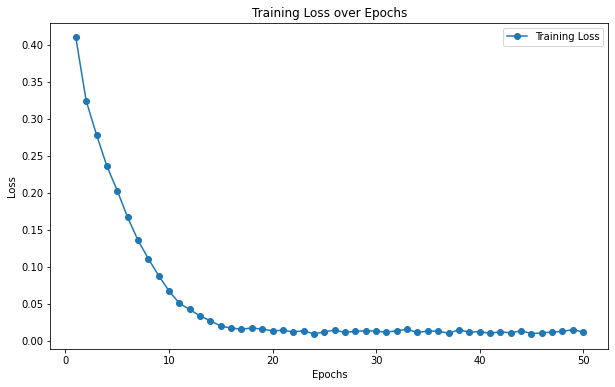

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(epochs, loss, label='Training Loss', marker='o', linestyle='-')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.legend()
plt.show()

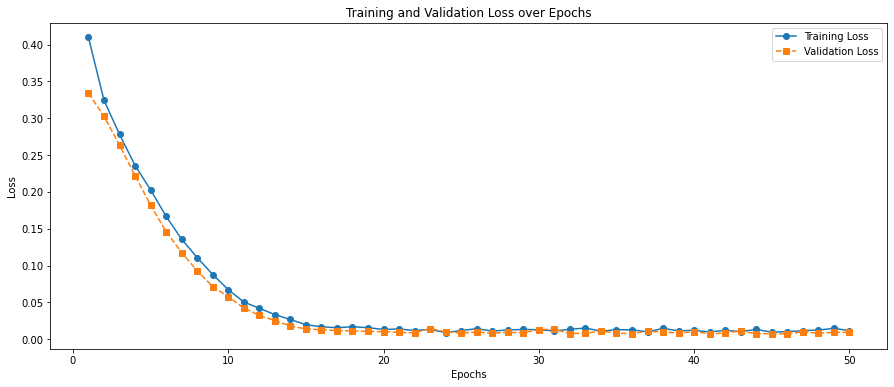

In [15]:
training_loss = history.history['loss']
validation_loss = history.history['val_loss']
epochs = range(1, len(training_loss) + 1)

plt.figure(figsize=(15,6))
plt.plot(epochs, training_loss, label='Training Loss', marker='o', linestyle='-')
plt.plot(epochs, validation_loss, label='Validation Loss', marker='s', linestyle='--')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss over Epochs')
plt.legend()
plt.show()

In [16]:
from tensorflow.keras.models import load_model
model1 = load_model('Ross_model_LT4/')

In [17]:
test_predictions = model1.predict(X_test)

2/2 [==============================] - 0s 6ms/step


In [18]:
mse = mean_squared_error(y_test, test_predictions)
print('RMSE :', np.sqrt(mse))

mae = mean_absolute_error(y_test, test_predictions)
print('MAE :', mae)

RMSE : 0.08526982524983973
MAE : 0.061498989848905485


In [19]:
test_predictions = scaler.inverse_transform(test_predictions)
test_original = scaler.inverse_transform(y_test.reshape(-1,1))

In [20]:
train_results = pd.DataFrame(data={'Train Predictions': test_predictions.flatten(), 'Actual Extent': test_original.flatten()})
train_results

,Train Predictions,Actual Extent
0,3.821257e+06,3794128.369
1,3.957293e+06,3885746.442
2,3.869588e+06,3909211.179
3,3.425547e+06,3499167.351
4,2.219018e+06,2715890.297
5,1.126178e+06,1053272.694
6,2.921486e+05,368862.123
7,1.000361e+06,979418.298
8,1.567612e+06,2086269.569
9,2.527777e+06,2852731.016


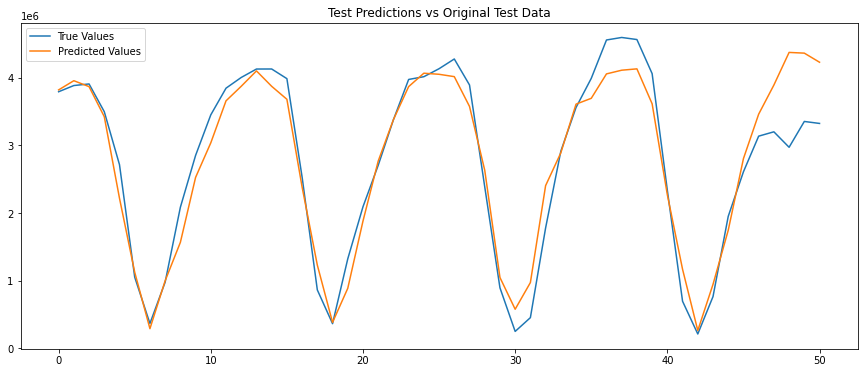

In [21]:
plt.figure(figsize=(15,6))
plt.plot(test_original, label='True Values')
plt.plot(test_predictions, label='Predicted Values')
plt.title('Test Predictions vs Original Test Data')
plt.legend()
plt.show()

In [22]:
predictions = model1.predict(X)

17/17 [==============================] - 0s 3ms/step


In [23]:
predictions = scaler.inverse_transform(predictions)
Original = scaler.inverse_transform(y.reshape(-1,1))

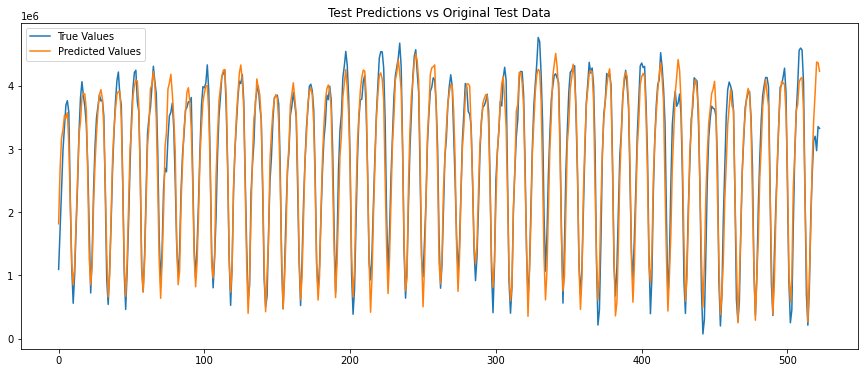

In [24]:
plt.figure(figsize=(15,6))
plt.plot(Original, label='True Values')
plt.plot(predictions, label='Predicted Values')
plt.title('Test Predictions vs Original Test Data')
plt.legend()
plt.show()